<h1>NLTK Book Notes Chapter 1</h1>

<p>Going to begin to parse through Natural Language Processing via Python. I'll be following along with the <a href="http://www.nltk.org/book">free book</a> created by the creators of the Natural Language Toolkit (NLTK).</p>

<p>This notebook for now will just be chapter 1 of the book (Python and Natural Language Processing) but if the need arises I'll extend it to be more of the book.</p>

<h3> Importing and Downloading </h3>

<p> Via the Python interpreter the easiest way to install is simply 'pip3 install nltk', followed by 'nltk.download(`all`) in a Python interpreter.</p>

In [1]:
import os

from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<p>To get into on any nltk object just enter the object name </p>

In [2]:
print(text1)
print(text2)

<Text: Moby Dick by Herman Melville 1851>
<Text: Sense and Sensibility by Jane Austen 1811>


<h3>Searching Text</h3>

<p>The concordance method of an nltk object allows us to view every use of a word along with some context for that word.</p>

In [3]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


<strong>All instances of the word 'light' in the Book of Genesis: </p>

In [4]:
text3.concordance("light")

Displaying 11 of 11 matches:
waters . And God said , Let there be light : and there was light . And God saw 
, Let there be light : and there was light . And God saw the light , that it wa
nd there was light . And God saw the light , that it was good : and God divided
at it was good : and God divided the light from the darkness . And God called t
om the darkness . And God called the light Day , and the darkness he called Nig
 the firmament of the heaven to give light upon the ear and it was so . And God
 made two great lights ; the greater light to rule the day , and the lesser lig
ght to rule the day , and the lesser light to rule the nig he made the stars al
 the firmament of the heaven to give light upon the earth , And to rule over th
d over the night , and to divide the light from the darkne and God saw that it 
 spoken . As soon as the morning was light , the men were sent away , they and 


<p>We can view other words that appearc in similar contexts to these words. For instance, 'monstrous' appeared as "of monstrous clubs" but what other words might appear in similar contexts?</p>

In [5]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [6]:
text3.similar("good")

god cattle beast him you me not gold thee bread jacob corn day them
life fowl dust adam afraid skins


<p>The <strong>common_contexts()</strong> method can be used to show the context results of the similar() method.</p>

In [7]:
text3.common_contexts(["good", "god"])

of_and but_and the_of


<p>NLTK can also display the location of a word within a document via a <strong>Dispersion Plot</strong>.</p>

/Users/mickey/.local/share/virtualenvs/Flow-pySRtaAc/lib/python3.7/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded " "(please install Tkinter library).")


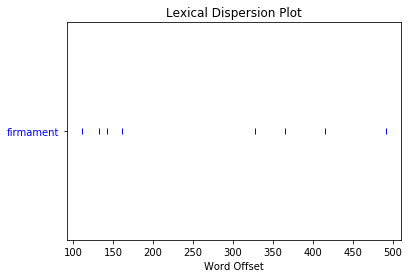

In [8]:
text3.dispersion_plot(["firmament"])
#os.system('convert output.ps output.png')
#Image(filename='output.png')

<h3>Counting Vocabulary</h3>

In [9]:
print('The number of words used in the Book of Genesis is {}'.format(len(text3)))

The number of words used in the Book of Genesis is 44764


In [10]:
print('The number of distinct words contained in the Book of Geneis is {}'
     .format(len(sorted(set(text3)))))

The number of distinct words contained in the Book of Geneis is 2789


<p>The lexical richness of a text is the ratio of the number of unique words in the text to the total number of words in the text</p>

In [11]:
print("The lexical richness of the Book of Genesis is %.2f%%" %
      (len(set(text3)) / len(text3) * 100))

The lexical richness of the Book of Genesis is 6.23%


<strong>Specific words</strong>

In [12]:
smote_count = text3.count("smote")

print("The word 'smote' makes up %.6f%% of the Book of Genesis" % 
     (smote_count / len(text3) * 100))

God_count = text3.count("God")

print("The word 'God' makes up %.6f%% of the Book of Genesis" % 
     (God_count / len(text3) * 100))

The word 'smote' makes up 0.011170% of the Book of Genesis
The word 'God' makes up 0.516040% of the Book of Genesis


<p>Useful little functions:</p>

In [13]:
def lexical_diversity(text):
    diversity = len(set(text)) / len(text)
    print("The lexical diversity of %s is %.2f" % (text, diversity))
    return diversity

def percentage(word, text):
    word_count = text.count(word)
    percentage = word_count / len(text) * 100
    print("The word %s took up %.5f%% of %s" % (word, percentage, text))
    return percentage

percentage("God", text3)

lexical_diversity(text1)
lexical_diversity(text5)

The word God took up 0.51604% of <Text: The Book of Genesis>
The lexical diversity of <Text: Moby Dick by Herman Melville 1851> is 0.07
The lexical diversity of <Text: Chat Corpus> is 0.13


0.13477005109975562

<h3>Statistical Analysis</h3>

In [14]:
fdist1 = FreqDist(text1)

print(fdist1)

most_common_words = fdist1.most_common(50)

for i, (word, freq) in enumerate(most_common_words):
    print("%d: word=%s freq=%s" % (i+1,word, freq))

<FreqDist with 19317 samples and 260819 outcomes>
1: word=, freq=18713
2: word=the freq=13721
3: word=. freq=6862
4: word=of freq=6536
5: word=and freq=6024
6: word=a freq=4569
7: word=to freq=4542
8: word=; freq=4072
9: word=in freq=3916
10: word=that freq=2982
11: word=' freq=2684
12: word=- freq=2552
13: word=his freq=2459
14: word=it freq=2209
15: word=I freq=2124
16: word=s freq=1739
17: word=is freq=1695
18: word=he freq=1661
19: word=with freq=1659
20: word=was freq=1632
21: word=as freq=1620
22: word=" freq=1478
23: word=all freq=1462
24: word=for freq=1414
25: word=this freq=1280
26: word=! freq=1269
27: word=at freq=1231
28: word=by freq=1137
29: word=but freq=1113
30: word=not freq=1103
31: word=-- freq=1070
32: word=him freq=1058
33: word=from freq=1052
34: word=be freq=1030
35: word=on freq=1005
36: word=so freq=918
37: word=whale freq=906
38: word=one freq=889
39: word=you freq=841
40: word=had freq=767
41: word=have freq=760
42: word=there freq=715
43: word=But freq=705


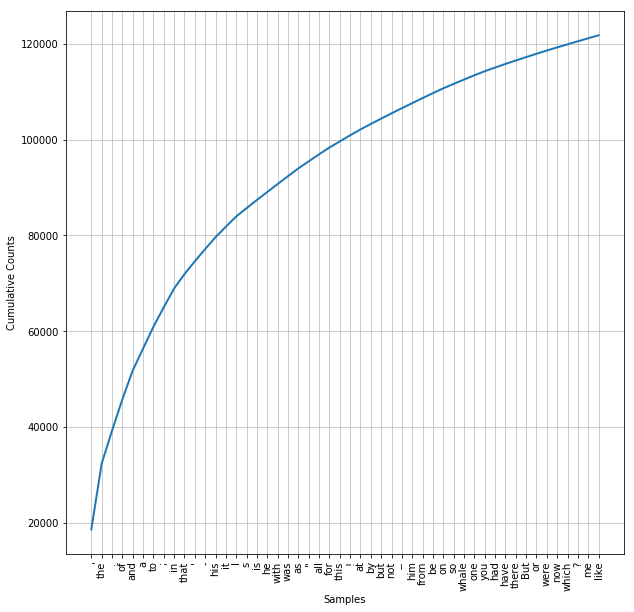

In [15]:
plt.figure(figsize=(10,10))
fdist1.plot(50, cumulative=True)

<p>A hapax is a word that appears only once in the text.</p>

In [16]:
num_hapaxes = len(fdist1.hapaxes())
print("The number of words appearing only once in %s is %d" % (text1, num_hapaxes))

random_ix = np.random.randint(num_hapaxes)
random_word = fdist1.hapaxes()[random_ix]
print("A random word appearing only once in %s is %s" % (text1, random_word))

The number of words appearing only once in <Text: Moby Dick by Herman Melville 1851> is 9002
A random word appearing only once in <Text: Moby Dick by Herman Melville 1851> is spiralized


<h3>Fine-grained selection of words</h3>

<p>Looking now at long words that appear in the text. This is a good example of setting conditional queries within a text</p>

In [17]:
V = set(text1)

long_words = [w for w in V if len(w) > 15]

random_long_ix = np.random.randint(len(long_words))
random_long_word = long_words[random_long_ix]

print("%s is a long word from %s!" % (random_long_word, text1))

CIRCUMNAVIGATION is a long word from <Text: Moby Dick by Herman Melville 1851>!


In [18]:
fdist5 = FreqDist(text5)
long_freq_chat_words = sorted([w for w in set(text5) if len(w) > 7 and fdist5[w] > 7])
for word in long_freq_chat_words:
    print(word)

#14-19teens
#talkcity_adults
((((((((((
........
Question
actually
anything
computer
cute.-ass
everyone
football
innocent
listening
remember
seriously
something
together
tomorrow
watching


<h3>Collocations and Bigrams</h3>

<strong>collocation: </strong> <p>Words that typically occur together.</p>

In [19]:
basic_bigrams = bigrams(['more', 'is', 'said', 'than', 'done'])
basic_bigram_list = list(basic_bigrams)
for bigram in basic_bigram_list:
    print(bigram)

('more', 'is')
('is', 'said')
('said', 'than')
('than', 'done')


<p>A collocation is just a frequently occurring bigram</p>

In [27]:
address_collocations = text4.collocations()
print(address_collocations)

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties
None


<h3>Counting Other Things</h3>

In [31]:
word_lengths = [len(w) for w in text1]

for i in zip(word_lengths[100:150], text1[100:150]):
    print(i)

(3, 'and')
(2, 'to')
(5, 'teach')
(4, 'them')
(2, 'by')
(4, 'what')
(4, 'name')
(1, 'a')
(5, 'whale')
(1, '-')
(4, 'fish')
(2, 'is')
(2, 'to')
(2, 'be')
(6, 'called')
(2, 'in')
(3, 'our')
(6, 'tongue')
(7, 'leaving')
(3, 'out')
(1, ',')
(7, 'through')
(9, 'ignorance')
(1, ',')
(3, 'the')
(6, 'letter')
(1, 'H')
(1, ',')
(5, 'which')
(6, 'almost')
(5, 'alone')
(6, 'maketh')
(3, 'the')
(13, 'signification')
(2, 'of')
(3, 'the')
(4, 'word')
(1, ',')
(3, 'you')
(7, 'deliver')
(4, 'that')
(5, 'which')
(2, 'is')
(3, 'not')
(4, 'true')
(2, '."')
(2, '--')
(8, 'HACKLUYT')
(1, '"')
(5, 'WHALE')


In [46]:
fdist = FreqDist(len(w) for w in text1)
print(fdist)

for key, val in fdist.items():
    print(key, val)

<FreqDist with 19 samples and 260819 outcomes>
1 47933
4 42345
2 38513
6 17111
8 9966
9 6428
11 1873
5 26597
7 14399
3 50223
10 3528
12 1053
13 567
14 177
16 22
15 70
17 12
18 1
20 1


In [54]:
ten_most_common_lengths = fdist.most_common()[0:10]

print("The ten most common word lengths in %s: " % (text1))

for (length, freq) in ten_most_common_lengths:
    print(length, freq)
    
print("The number of four letter words in %s is: %d" % (text1, fdist[2]))

print("\nThere are a total of %d 3 letter words in %s" % (fdist[3], text1))
print("%.2f%% of all words in %s are 3 letters long" % (fdist.freq(3)*100, text1))

The ten most common word lengths in <Text: Moby Dick by Herman Melville 1851>: 
3 50223
1 47933
4 42345
2 38513
5 26597
6 17111
7 14399
8 9966
9 6428
10 3528
The number of four letter words in <Text: Moby Dick by Herman Melville 1851> is: 38513

There are a total of 50223 3 letter words in <Text: Moby Dick by Herman Melville 1851>
19.26% of all words in <Text: Moby Dick by Herman Melville 1851> are 3 letters long


<h3>Word Operations from NLTK</h3>

In [57]:
print("The first sentence from text 7 (%s):" % (text7))

print(sent7)
short_sent7_words = [w for w in sent7 if len(w) < 4]
print(short_sent7_words)

The first sentence from text 7 (<Text: Wall Street Journal>):
['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
[',', '61', 'old', ',', 'the', 'as', 'a', '29', '.']


<p>A list of word comparison functions from nltk: </p>

```
s.startswith(t)	test if s starts with t
s.endswith(t)	  test if s ends with t
t in s      	   test if t is a substring of s
s.islower()	    test if s contains cased characters and all are lowercase
s.isupper()	    test if s contains cased characters and all are uppercase
s.isalpha()	    test if s is non-empty and all characters in s are alphabetic
s.isalnum()	    test if s is non-empty and all characters in s are alphanumeric
s.isdigit()	    test if s is non-empty and all characters in s are digits
s.istitle()	    test if s contains cased characters and is titlecased (i.e. all words in s                     have initial capitals)
```

In [61]:
print("All words in Moby Dick that end in '-ableness: '")
print(sorted(w for w in set(text1) if w.endswith('ableness')))

All words in Moby Dick that end in '-ableness: '
['comfortableness', 'honourableness', 'immutableness', 'indispensableness', 'indomitableness', 'intolerableness', 'palpableness', 'reasonableness', 'uncomfortableness']


<h3>Operating on Every Element</h3>

<p>We might want to shift the text around. As it stands the word 'This' is counted as different than 'this' so we might have to do things like make every word lowercase for statistical analysis. We can also filter out punctuation.</p>

In [64]:
big_moby = [w.upper() for w in text1]
print(big_moby[0:10])

['[', 'MOBY', 'DICK', 'BY', 'HERMAN', 'MELVILLE', '1851', ']', 'ETYMOLOGY', '.']


In [68]:
little_moby = set([w.lower() for w in text1])

print(len(text1))
print(len(set(text1)))
print(len(little_moby))

260819
19317
17231


In [70]:
no_punc = set([word.lower() for word in text1 if word.isalpha()])
print(len(no_punc))

16948


<h2>Automatic Natural Language Understanding</h2>

In [74]:
text1.generate()

TypeError: generate() missing 1 required positional argument: 'words'